<a href="https://colab.research.google.com/github/Haritha2298/DATA_MINING-/blob/master/task1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
import numpy as np

In [0]:
df = pd.read_csv('/cleandataset.csv')

In [410]:
#overview of the dataset 
df.head()



,PROGRAMME,MLCOURSE,INFORET,STATS,DB,GENDER,CHOCOLATE,BIRTHDAY,NEIGHBOR,STAND,STRESSLEVEL,MONEY,RAND,SLEEPTIME,GOODDAY,GOODDAY_2
0,Computational Science,no,unknown,mu,ja,female,fat,05-08-1998,0,no,0,4,227,10:30:00 PM,Good weather,Sporting
1,Quantitative Risk Management,no,0,mu,nee,male,unknown,1996,2,no,85,25,65,11:05:00 PM,chill,coffee
2,MSc Computational Science,no,0,mu,ja,female,neither,12th June,4,no,50,10,3,10:00:00 PM,Waking up early and preparing for the day by p...,Using the early morning time to study
3,MSc Finance - QRM,no,0,mu,nee,female,neither,19-06-1994,0,no,10,99,2,11:00:00 PM,eating good food,spending time with friends
4,BA,yes,0,mu,ja,male,neither,29-09-1993,0,no,60,80,7,10:00:00 PM,Sun is shining,Intimate contact with friends and family


In [0]:
pq = set(df['PROGRAMME'].to_list())

In [412]:
len(pq)

120

In [413]:
#checking for null values
print(df.isnull().sum())

PROGRAMME      0
MLCOURSE       0
INFORET        0
STATS          0
DB             0
GENDER         0
CHOCOLATE      0
BIRTHDAY       0
NEIGHBOR       0
STAND          0
STRESSLEVEL    0
MONEY          0
RAND           0
SLEEPTIME      0
GOODDAY        0
GOODDAY_2      0
dtype: int64


In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PROGRAMME    279 non-null    object
 1   MLCOURSE     279 non-null    object
 2   INFORET      279 non-null    object
 3   STATS        279 non-null    object
 4   DB           279 non-null    object
 5   GENDER       279 non-null    object
 6   CHOCOLATE    279 non-null    object
 7   BIRTHDAY     279 non-null    object
 8   NEIGHBOR     279 non-null    object
 9   STAND        279 non-null    object
 10  STRESSLEVEL  279 non-null    object
 11  MONEY        279 non-null    object
 12  RAND         279 non-null    object
 13  SLEEPTIME    279 non-null    object
 14  GOODDAY      279 non-null    object
 15  GOODDAY_2    279 non-null    object
dtypes: object(16)
memory usage: 35.0+ KB


In [415]:
df.describe()

,PROGRAMME,MLCOURSE,INFORET,STATS,DB,GENDER,CHOCOLATE,BIRTHDAY,NEIGHBOR,STAND,STRESSLEVEL,MONEY,RAND,SLEEPTIME,GOODDAY,GOODDAY_2
count,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279
unique,120,3,3,3,3,3,5,267,17,3,52,81,85,59,207,228
top,AI,yes,0,mu,ja,male,fat,14-05-1997,0,no,30,10,7,11:30:00 PM,Sun,Friends
freq,26,177,188,240,143,158,120,3,178,256,29,28,43,42,12,8


In [416]:
df.shape

(279, 16)

In [0]:
df = df.drop_duplicates()

In [418]:
df.shape

(278, 16)

In [0]:
df.index = range(278)

In [0]:
#Preprocess
#Not useful column
df = df.drop(["MONEY"], axis=1)
#PREPROCESS
#drop birthday column as it too clumsy and not needed dor our analysis.
df = df.drop(["BIRTHDAY"],axis= 1)

In [0]:
#column headings to lower case
df.columns = [col.lower() for col in df]


In [0]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


In [0]:
p1 = set(df['programme'].to_list())

In [424]:
len(p1)

120

In [0]:
#remmove special characters
import re
pd.options.mode.chained_assignment = None
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['programme'] = df['programme'].str.replace(char, ' ')
    df['goodday'] = df['goodday'].str.replace(char, ' ')
    df['goodday_2'] = df['goodday_2'].str.replace(char, ' ')
    df['neighbor'] = df['neighbor'].str.replace(char, ' ')
    df['stresslevel'] = df['stresslevel'].str.replace(char, '')
 

In [0]:
ps = set(df['programme'].to_list())

In [427]:
len(ps)

120

In [428]:
print(df.columns)

Index(['programme', 'mlcourse', 'inforet', 'stats', 'db', 'gender',
       'chocolate', 'neighbor', 'stand', 'stresslevel', 'rand', 'sleeptime ',
       'goodday', 'goodday_2'],
      dtype='object')


In [0]:
df.programme = df.programme.str.lower()

In [0]:
pp = set(df['programme'].to_list())

In [323]:
len(pp)

105

In [324]:
pp

{'ai',
 'ai in utrecht',
 'ai uva',
 'artificial intelligence',
 'artificial intelligence (uva)',
 'artificial intelligence and cognitive science',
 'artificial intelligence msc',
 'artificial intelligence track on cognitive science',
 'ba',
 'big data engineering',
 'bioinformatics',
 'bioinformatics and systems biology',
 'bioinformatics and systems biology master',
 'bioinformatics and systems biology msc',
 'business administration',
 'business analytics',
 'business analytics master',
 'cls',
 'computational science',
 'computational science (joint uva/vu)',
 'computational science/ai',
 'computer science',
 'computer science big data engineering',
 'computer science master',
 'computer science(big data engineering track)',
 'cps',
 'cs',
 'cs:parallel computing systems',
 'dhpqrm',
 'digital business & innovation',
 'digital business and innovation',
 'duisenberg honours programme in quantitative risk management',
 'econometrics',
 'econometrics & operations research',
 'economet

In [430]:
#Checking the series conversion
#print(programme)
print(type(programme))

<class 'list'>


In [431]:
#Converting back to list
programme = programme.values.tolist()
df['programme'] = programme

AttributeError: ignored

In [351]:
df.programme

0             computational science
1      quantitative risk management
2         msc computational science
3                 msc finance   qrm
4                                ba
                   ...             
273         mechenaical engineering
274                              cs
275         artificial intelligence
276         artificial intelligence
277         artificial intelligence
Name: programme, Length: 278, dtype: object

In [0]:
#Conversion of goodday_2 column to series in order to convert all character to lower case
goodday_2 = df.iloc[:,13]
goodday_2 = goodday_2.str.lower()


In [0]:
#Conversion back to list
goodday_2 = goodday_2.values.tolist() 
df['goodday_2'] = goodday_2

In [0]:
#Conversion of goodday column to series in order to convert all character to lower case
goodday = df.iloc[:,12]
goodday = goodday.str.lower()

In [0]:
#Conversion back to list
goodday = goodday.values.tolist() 
df['goodday'] = goodday

In [436]:
df

,programme,mlcourse,inforet,stats,db,gender,chocolate,neighbor,stand,stresslevel,rand,sleeptime,goodday,goodday_2
0,computational science,no,unknown,mu,ja,female,fat,0,no,0,227,10:30:00 PM,good weather,sporting
1,quantitative risk management,no,0,mu,nee,male,unknown,2,no,85,65,11:05:00 PM,chill,coffee
2,msc computational science,no,0,mu,ja,female,neither,4,no,50,3,10:00:00 PM,waking up early and preparing for the day by p...,using the early morning time to study
3,msc finance qrm,no,0,mu,nee,female,neither,0,no,10,2,11:00:00 PM,eating good food,spending time with friends
4,ba,yes,0,mu,ja,male,neither,0,no,60,7,10:00:00 PM,sun is shining,intimate contact with friends and family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,mechenaical engineering,yes,1,mu,nee,male,fat,2,no,69,6,1:00:00 AM,no corona,no corona 2
274,cs,no,0,mu,ja,male,fat,0,no,10,7,9:45:00 PM,netflix,chill
275,artificial intelligence,yes,1,mu,ja,male,neither,12,yes,60,42,1:37:00 PM,finishing all tasks,finding an extra package of ice cream
276,artificial intelligence,no,0,mu,nee,female,neither,1,no,70,69,12:00:00 AM,food,orgasm


In [0]:
#sleeptime mode was found and replaced with all the missing and outlier values using excel

In [0]:
#Working with stresslevel column
df.stresslevel = df.stresslevel.replace('', np.nan)

In [0]:
df.stresslevel = df.stresslevel.fillna(0)

In [439]:
df.stresslevel.dtype

dtype('O')

In [0]:
df["stresslevel"] = df["stresslevel"].astype(str).astype(float)

In [441]:
df.stresslevel.std()

27.726937603200604

In [442]:
df.stresslevel.mean()

41.98201438848921

In [443]:
df.stresslevel.dtype

dtype('float64')

In [0]:
#Changing it into numerical value 
# stats course
df["stats"]= df["stats"].replace("mu", 1)
df["stats"]= df["stats"].replace("sigma", 0)
df["stats"]= df["stats"].replace("unknown", 2)
#mlcourse
df["mlcourse"]= df["mlcourse"].replace("yes", 1)
df["mlcourse"]= df["mlcourse"].replace("no", 0)
df["mlcourse"]= df["mlcourse"].replace("unknown", 2)
#db
df["db"]= df["db"].replace("ja", 1)
df["db"]= df["db"].replace("nee", 0)
df["db"]= df["db"].replace("unknown", 2)
# gender
df["gender"]= df["gender"].replace("male", 0)
df["gender"]= df["gender"].replace("female", 1)
df["gender"]= df["gender"].replace("unknown", 2)
# inforet
df["inforet"]= df["inforet"].replace("unknown", 2)

In [446]:
#co-sine similarity
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import spatial
from sklearn.metrics.pairwise import *

clf = TfidfVectorizer()

clf.fit(df['goodday'] + " " + df['goodday_2'])

A = clf.transform(df['goodday_2'])

B = clf.transform(df['goodday_2'])


#calculate cosine distance
paired_cosine_distances(A, B)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

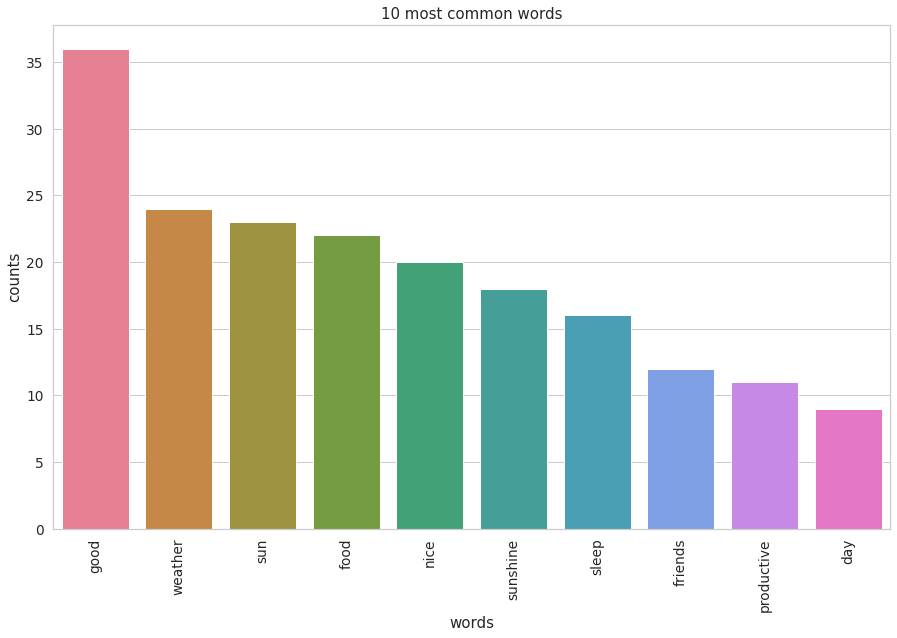

In [447]:
#Working with goodday column
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['goodday'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [448]:
#Working with good day column
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
productive day work sunny company schedule tasks finished assignments things

Topic #1:
weather nice good breakfast outside work coffee sunny fun people

Topic #2:
sun friends having sport time meeting goes alcohol sports research

Topic #3:
sunshine productivity chocolate corona laughs people eating meeting goals playing

Topic #4:
good food sleep night coffee great doing new assignments learned


In [449]:
!python3 -m pip install -U pyLDAvis


Requirement already up-to-date: pyLDAvis in /usr/local/lib/python3.6/dist-packages (2.1.2)


In [0]:
df

,programme,mlcourse,inforet,stats,db,gender,chocolate,neighbor,stand,stresslevel,rand,sleeptime,goodday,goodday_2
0,computational science,0,2,1,1,1,fat,0,no,0,227,10:30:00 PM,good weather,sporting
1,quantitative risk management,0,0,1,0,0,unknown,2,no,85,65,11:05:00 PM,chill,coffee
2,msc computational science,0,0,1,1,1,neither,4,no,50,3,10:00:00 PM,waking up early and preparing for the day by p...,using the early morning time to study
3,msc finance qrm,0,0,1,0,1,neither,0,no,10,2,11:00:00 PM,eating good food,spending time with friends
4,ba,1,0,1,1,0,neither,0,no,60,7,10:00:00 PM,sun is shining,intimate contact with friends and family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,mechenaical engineering,1,1,1,0,0,fat,2,no,69,6,1:00:00 AM,no corona,no corona 2
274,cs,0,0,1,1,0,fat,0,no,10,7,9:45:00 PM,netflix,chill
275,artificial intelligence,1,1,1,1,0,neither,12,yes,60,42,1:37:00 PM,finishing all tasks,finding an extra package of ice cream
276,artificial intelligence,0,0,1,0,1,neither,1,no,70,69,12:00:00 AM,food,orgasm


In [0]:
abbreviations = {
 "ai": "artificial intelligence", 
 "ai in utrecht": "artificial intelligence",
 "ai uva": "artificial intelligence",
 "artificial intelligence  uva ": "artificial intelligence",
 "artificial intelligence and cognitive science": "artificial intelligence",
 "artificial intelligence msc": "artificial intelligence",
 "artificial intelligence track on cognitive science": "artificial intelligence",
 "ba" : "business analytics",
 "big data engineering" : "computer science",
 "bioinformatics and systems biology": "bioinformatics",
 "bioinformatics and systems biology master": "bioinformatics",
 "bioinformatics and systems biology msc": "bioinformatics",
 "business analytics" : "business analytics",
 "business analytics master" : "business analytics",
 "cls" : "cls",
 "computational science  joint uva vu " : "computational science",
 "computational science ai" : "computational science",
 "computer science big data engineering" : "computer science",
 "computer science big data engineering track " : "computer science",
 "computer science master" : "computer science",
 "cps" : "computational science",
 "cs" : "computer science",
 "cs parallel computing systems" : "computer science",
 "dhpqrm" : "duisenberg honours programme in quantitative risk management" ,
 "digital business   innovation": "business administration",
 "digital business and innovation": "business administration",
 "econometrics   operations research": "econometrics",
 "econometrics and data science": "econometrics",
 "econometrics and operation research": "econometrics",
 "econometrics and operations research": "econometrics",
 "eor": "econometrics",
 "finance   technology" : "finance",
 "finance   technology master" : "finance",
 "finance  quantitative risk management" : "finance",
 "finance  quantitative risk management " : "finance",
 "finance and technology" : "finance",
 "finance honours in quantitative risk management" : "finance",
 "finance qrm" : "finance",
 "human language technologies  humanities research " : "human language technology",
 "human movement science research master" : "human movement science",
 "information science  uva ":"information sciences",
 "information sciences  msc ":"information sciences",
 "information studies  data science track at uva":"information sciences",
 "information studies  track  information systems ":"information sciences",
 "m sc  artificial intelligence": "artificial intelligence",
 "m sc  in computer science" : "computer science",
 "master ai": "artificial intelligence",
 "master artificial intelligence": "artificial intelligence",
 "master business administration  digital business and innovation": "business administration",
 "master business analytics" : "business analytics",
 "master computational science" : "computational science",
 "master digital business   innovation  sbe ": "business administration",
 "master econometrics uva": "econometrics",
 "master finance  qrm" : "finance",
 "master forensic science":"forensic science",
 "master of finance" : "finance",
 "masters bioinformatics and system biology": "bioinformatics",
 "masters in artificial intelligence": "artificial intelligence",
 "masters in business analytics" : "business analytics",
 "masters in parallel and distributed computer systems": "parallel and distributed computer systems",
 "ms cs big data engineering" : "computer science",
 "msc   computer science   big data engineering" : "computer science",
 "msc  econometrics and operations research": "econometrics",
 "msc ai": "artificial intelligence",
 "msc ai  cognitive science track ": "artificial intelligence",
 "msc ai  uva ": "artificial intelligence",
 "msc ai vrije universiteit": "artificial intelligence",
 "msc ai vu": "artificial intelligence",
 "msc artificial intelligence": "artificial intelligence",
 "msc artificial intelligence  uva ": "artificial intelligence",
 "msc artificial intelligence  vu ": "artificial intelligence",
 "msc bioinformatics": "bioinformatics",
 "msc computational science" : "computational science",
 "msc cs big data engineering" : "computer science",
 "msc datascience uva":"data science",
 "msc digital business and innovation  vu ": "business administration",
 "msc econometrics": "econometrics",
 "msc econometrics and operations research": "econometrics",
 "msc finance   qrm" : "finance",
 "msc in ai": "artificial intelligence",
 "physics and astronomy  grappa":"physics and astronomy",
 "qrm" : "finance",
 "quantitative risk management" : "finance",
 "quantitative risk management  finance " : "finance",
 "research master human language technology" : "human language technology",
 "vu ai": "artificial intelligence"
}
df['programme'] = df['programme'].replace(abbreviations)

In [0]:
#Working with neighbor column
df['neighbor'] = df['neighbor'].str.replace(r'[^\d.]+', '')

In [0]:
df.neighbor = df.neighbor.replace('', 0)

In [0]:
df.neighbor = df.neighbor.fillna(0)

In [454]:
df.neighbor


0       0
1       2
2       4
3       0
4       0
       ..
273     2
274     0
275    12
276     1
277     0
Name: neighbor, Length: 278, dtype: object

In [0]:
#Converting neighbor to numeric
neighbor = df.iloc[:,7]
df.neighbor = pd.to_numeric(neighbor)

In [0]:
#Converting gender to numeric
gender = df.iloc[:,5]
df.gender = pd.to_numeric(gender)

In [0]:
#Convert inforet to muneric
inforet = df.iloc[:,2]
df.inforet = pd.to_numeric(inforet)

In [458]:
#Finding the outlier
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
anomalies = []
indexlist = []


neigh = df.neighbor

# multiply and add by random numbers to get some real values
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(neigh):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(neigh)
    random_data_mean = np.mean(neigh)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    print(upper_limit)
    # Generate outliers
    for outlier in neigh:
        if outlier > upper_limit or outlier < lower_limit:
            
            print(df[df['neighbor']==outlier].index.values)
            anomalies.append(outlier)
            
            
    return anomalies
 
find_anomalies(neigh)

-123.25630181891351
130.5081003800646
[168]


[700]

In [0]:
#Dropping outlier
df = df.drop([168], axis=0)

In [462]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(df.stresslevel)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.954, p=0.000
Sample does not look Gaussian (reject H0)


In [461]:

from scipy.stats import shapiro
# normality test
stat, p = shapiro(df.stats)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.506, p=0.000
Sample does not look Gaussian (reject H0)


In [463]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(df.mlcourse)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.650, p=0.000
Sample does not look Gaussian (reject H0)


In [464]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(df.gender)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.670, p=0.000
Sample does not look Gaussian (reject H0)


In [465]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(df.db)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.696, p=0.000
Sample does not look Gaussian (reject H0)


In [466]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(df.inforet)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.643, p=0.000
Sample does not look Gaussian (reject H0)


In [467]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(df.neighbor)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.128, p=0.000
Sample does not look Gaussian (reject H0)


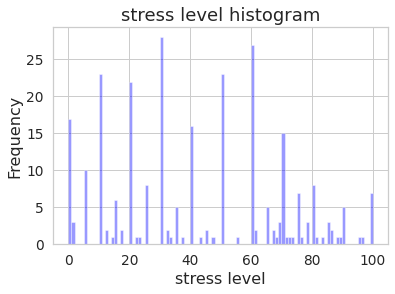

In [468]:
import seaborn as sns
hplot = sns.distplot(df['stresslevel'], kde=False, color='blue', bins=100)
plt.title('stress level histogram', fontsize=18)
plt.xlabel('stress level', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plot_file_name="stresslevel_histogram.jpg"
# save as jpeg
hplot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

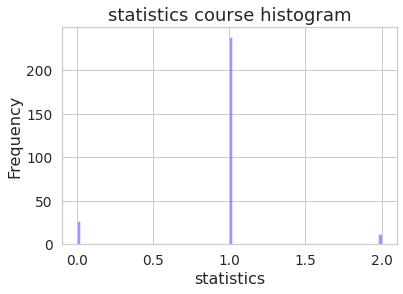

In [469]:
import seaborn as sns
hplot = sns.distplot(df['stats'], kde=False, color='blue', bins=100)
plt.title('statistics course histogram', fontsize=18)
plt.xlabel('statistics', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plot_file_name="stats_histogram.jpg"
# save as jpeg
hplot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

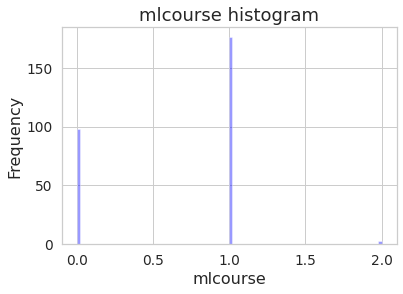

In [470]:
import seaborn as sns
hplot = sns.distplot(df['mlcourse'], kde=False, color='blue', bins=100)
plt.title('mlcourse histogram', fontsize=18)
plt.xlabel('mlcourse', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plot_file_name="mlcourse_histogram.jpg"
# save as jpeg
hplot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

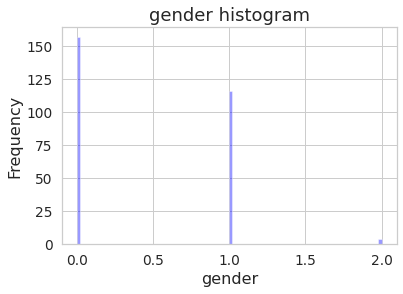

In [471]:
import seaborn as sns
hplot = sns.distplot(df['gender'], kde=False, color='blue', bins=100)
plt.title('gender histogram', fontsize=18)
plt.xlabel('gender', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plot_file_name="gender_histogram.jpg"
# save as jpeg
hplot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

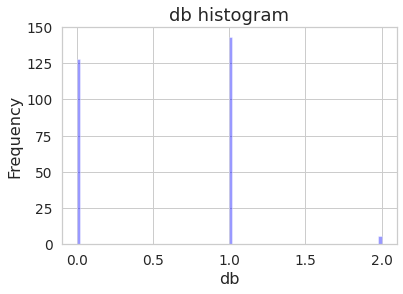

In [472]:
import seaborn as sns
hplot = sns.distplot(df['db'], kde=False, color='blue', bins=100)
plt.title('db histogram', fontsize=18)
plt.xlabel('db', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plot_file_name="db_histogram.jpg"
# save as jpeg
hplot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

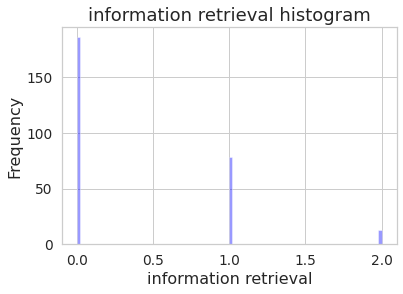

In [473]:
import seaborn as sns
hplot = sns.distplot(df['inforet'], kde=False, color='blue', bins=100)
plt.title('information retrieval histogram', fontsize=18)
plt.xlabel('information retrieval', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plot_file_name="info_histogram.jpg"
# save as jpeg
hplot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

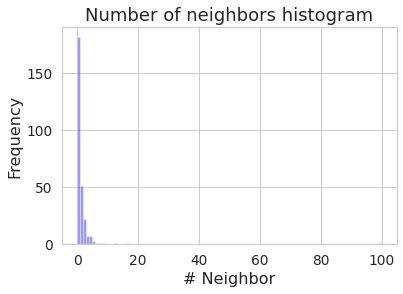

In [474]:
import seaborn as sns
hplot = sns.distplot(df['neighbor'], kde=False, color='blue', bins=100)
plt.title('Number of neighbors histogram', fontsize=18)
plt.xlabel('# Neighbor', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plot_file_name="neighbor_histogram.jpg"
# save as jpeg
hplot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [475]:
df.corr(method = 'spearman')

,mlcourse,inforet,stats,db,gender,neighbor,stresslevel
mlcourse,1.00000,0.14457,-0.03666,0.16308,-0.05313,-0.01615,0.04648
inforet,0.14457,1.00000,0.10691,0.28907,0.05127,-0.02296,-0.02636
stats,-0.03666,0.10691,1.00000,0.08163,0.00554,-0.07689,0.04187
db,0.16308,0.28907,0.08163,1.00000,-0.07501,0.07959,-0.01052
gender,-0.05313,0.05127,0.00554,-0.07501,1.00000,0.07876,0.08602
neighbor,-0.01615,-0.02296,-0.07689,0.07959,0.07876,1.00000,0.02835
stresslevel,0.04648,-0.02636,0.04187,-0.01052,0.08602,0.02835,1.00000


In [393]:
df

,programme,mlcourse,inforet,stats,db,gender,chocolate,neighbor,stand,stresslevel,rand,sleeptime,goodday,goodday_2
0,computational science,0,2,1,1,1,fat,0,no,0.00000,227,10:30:00 PM,good weather,sporting
1,finance,0,0,1,0,0,unknown,2,no,85.00000,65,11:05:00 PM,chill,coffee
2,computational science,0,0,1,1,1,neither,4,no,50.00000,3,10:00:00 PM,waking up early and preparing for the day by p...,using the early morning time to study
3,finance,0,0,1,0,1,neither,0,no,10.00000,2,11:00:00 PM,eating good food,spending time with friends
4,business analytics,1,0,1,1,0,neither,0,no,60.00000,7,10:00:00 PM,sun is shining,intimate contact with friends and family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,mechenaical engineering,1,1,1,0,0,fat,2,no,69.00000,6,1:00:00 AM,no corona,no corona 2
274,computer science,0,0,1,1,0,fat,0,no,10.00000,7,9:45:00 PM,netflix,chill
275,artificial intelligence,1,1,1,1,0,neither,12,yes,60.00000,42,1:37:00 PM,finishing all tasks,finding an extra package of ice cream
276,artificial intelligence,0,0,1,0,1,neither,1,no,70.00000,69,12:00:00 AM,food,orgasm


In [0]:
df.to_csv (r'/content/1amodel.csv', index = False, header=True)

In [0]:
#Some programmes were unable to change using dictionary 

                   programme  ...                  goodday_2
270  artificial intelligence  ...  making someone else happy

[1 rows x 14 columns]


In [0]:
df = pd.read_csv('/content/finale1a.csv')

In [0]:
correction = {
    "artificial intelligence  uva" : "artificial intelligence",
    "computer science big data engineering track": "computer science",
    "econometrics and operations research": "econometrics",
    "human movement science research master": "human language technology",
    "master digital business   innovation  sbe": "business administration",
    "msc digital business and innovation  vu": "business administration",
    "msc digital business and innovation  vu"
    "quantitative risk management": "finance",
    "quantitative risk management  finance": "finance",
    "big data engineering": "computer science"
}

df['programme']= df['programme'].replace(correction)

In [0]:
set(df['programme'].to_list())

{'0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '15',
 '18',
 '19',
 '2',
 '20',
 '22',
 '23',
 '24',
 '26',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 nan}

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

In [0]:
thisdict = {
  "artificial intelligence": 0,
  "bioinformatics" : 1,
  "business administration" : 2,
  "business analytics" : 3,
  "cls" : 4,
  "computational science" : 5,
  "computer science" : 6,
  "duisenberg honours programme in quantitative risk management" : 7,
  "econometrics" : 8,
  "erasmus" : 9,
  "exchange" : 10,
  "finance" : 11,
  "health sciences" : 12,
  "human language technology" : 13,
  "human movement science" : 14,
  "information sciences" : 15,
  "forensic science" : 16,
  "parallel and distributed computer systems" : 17,
  "mechenaical engineering" : 18,
  "medical informatics" : 19,
  "msc" : 20,
  "data science" : 21,
  "physics and astronomy": 22,
  "quantitative risk management": 23,
  "scientific computing": 24,
  "big data engineering": 25,
  "fintech" : 26
}

{'0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '15',
 '18',
 '19',
 '2',
 '20',
 '22',
 '23',
 '24',
 '26',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 nan}

In [0]:
df['programme'] = df['programme'].map(thisdict)

In [479]:
df.programme

0       5
1      11
2       5
3      11
4       3
       ..
273    18
274     6
275     0
276     0
277     0
Name: programme, Length: 277, dtype: int64

In [480]:
df.programme.isnull().sum()

0

In [0]:
#df.to_csv (r'/content/error1.csv', index = False, header=True)

In [0]:
dict = {
    "slim": "0",
    "fat" : "1",
    "neither": "2",
    "I have no idea what you are talking about": "3",
    "unknown":"4"
}

In [0]:
df['chocolate'] = df['chocolate'].map(dict)

In [483]:
df.chocolate.isnull().sum()

0

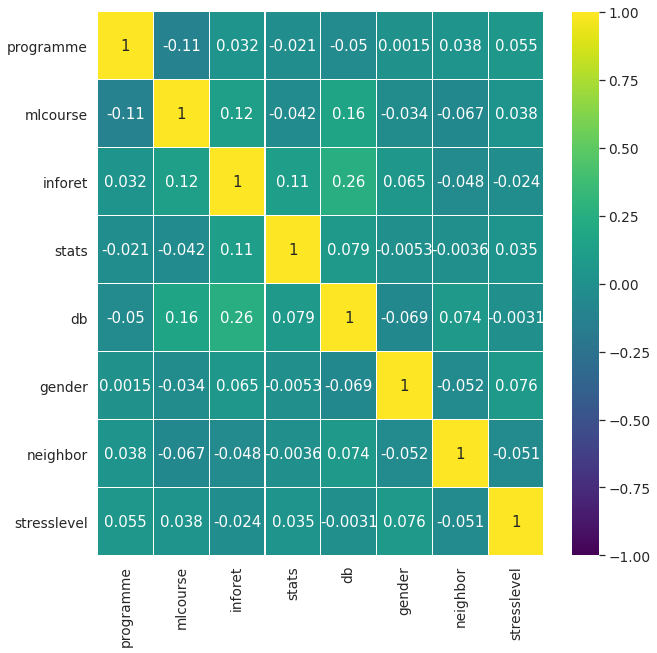

In [484]:
df_kor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
Y_1=df["stresslevel"] #Target variable
X_1=df[["programme", "gender"]]#Feature variables

In [0]:
#Splitting into train and test set
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_1, Y_1, test_size=0.50, random_state=42)

In [0]:
#Fitting the descision tree regressor model
regressor = DecisionTreeRegressor()

dt = regressor.fit(x_train1,y_train1)



In [0]:
#Predicting the model
y_pred1 = regressor.predict(x_test1)


In [0]:
from sklearn.metrics import r2_score,mean_squared_error

In [539]:
from sklearn import metrics
#Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

Mean Absolute Error: 23.480942464073852
Mean Squared Error: 857.2666879637727
Root Mean Squared Error: 29.27911692595548


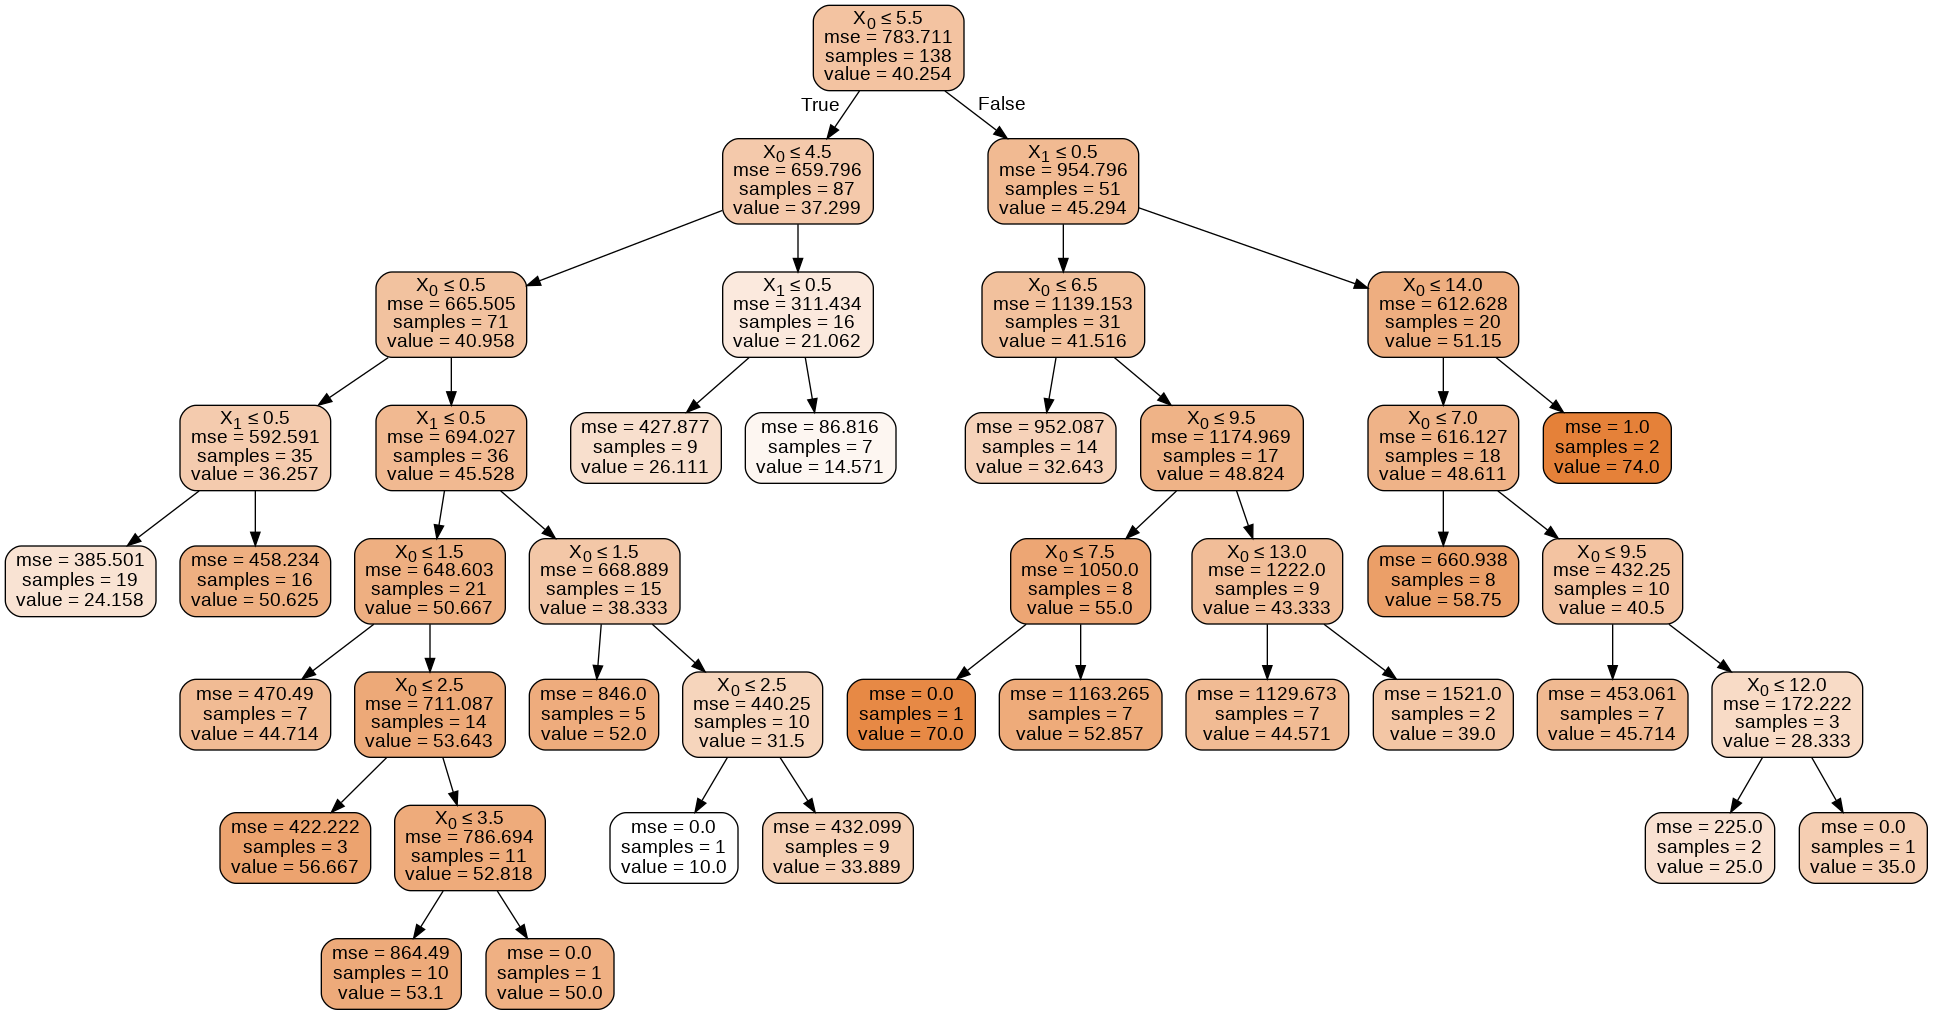

In [540]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('stresslevel.png')
Image(graph.create_png())

In [0]:
Y_2=df["stresslevel"] #Target variable
X_2=df[["programme", "gender","mlcourse","stats"]]#Feature variables

In [0]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, Y_2, test_size=0.2, random_state=0)

In [0]:
from sklearn.tree import DecisionTreeRegressor
regressormodel = DecisionTreeRegressor()
dtr = regressormodel.fit(X_train2, y_train2)

In [0]:
y_pred2 = regressormodel.predict(X_test2)

In [529]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
#Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

Mean Absolute Error: 28.608340419501133
Mean Squared Error: 1320.6189876636004
Root Mean Squared Error: 36.340321788113


In [523]:
df.stresslevel.mean()

41.978339350180505

In [524]:
df.describe()

,programme,mlcourse,inforet,stats,db,gender,neighbor,stresslevel
count,277.00000,277.00000,277.00000,277.00000,277.00000,277.00000,277.00000,277.00000
mean,4.87004,0.65704,0.37545,0.94585,0.55957,0.44765,1.11191,41.97834
std,4.96995,0.49789,0.57406,0.37197,0.53928,0.52644,6.19593,27.77705
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,20.00000
50%,3.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,40.00000
75%,8.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,65.00000
max,26.00000,2.00000,2.00000,2.00000,2.00000,2.00000,100.00000,100.00000


In [530]:
pip install graphviz

In [531]:
pip install pydotplus

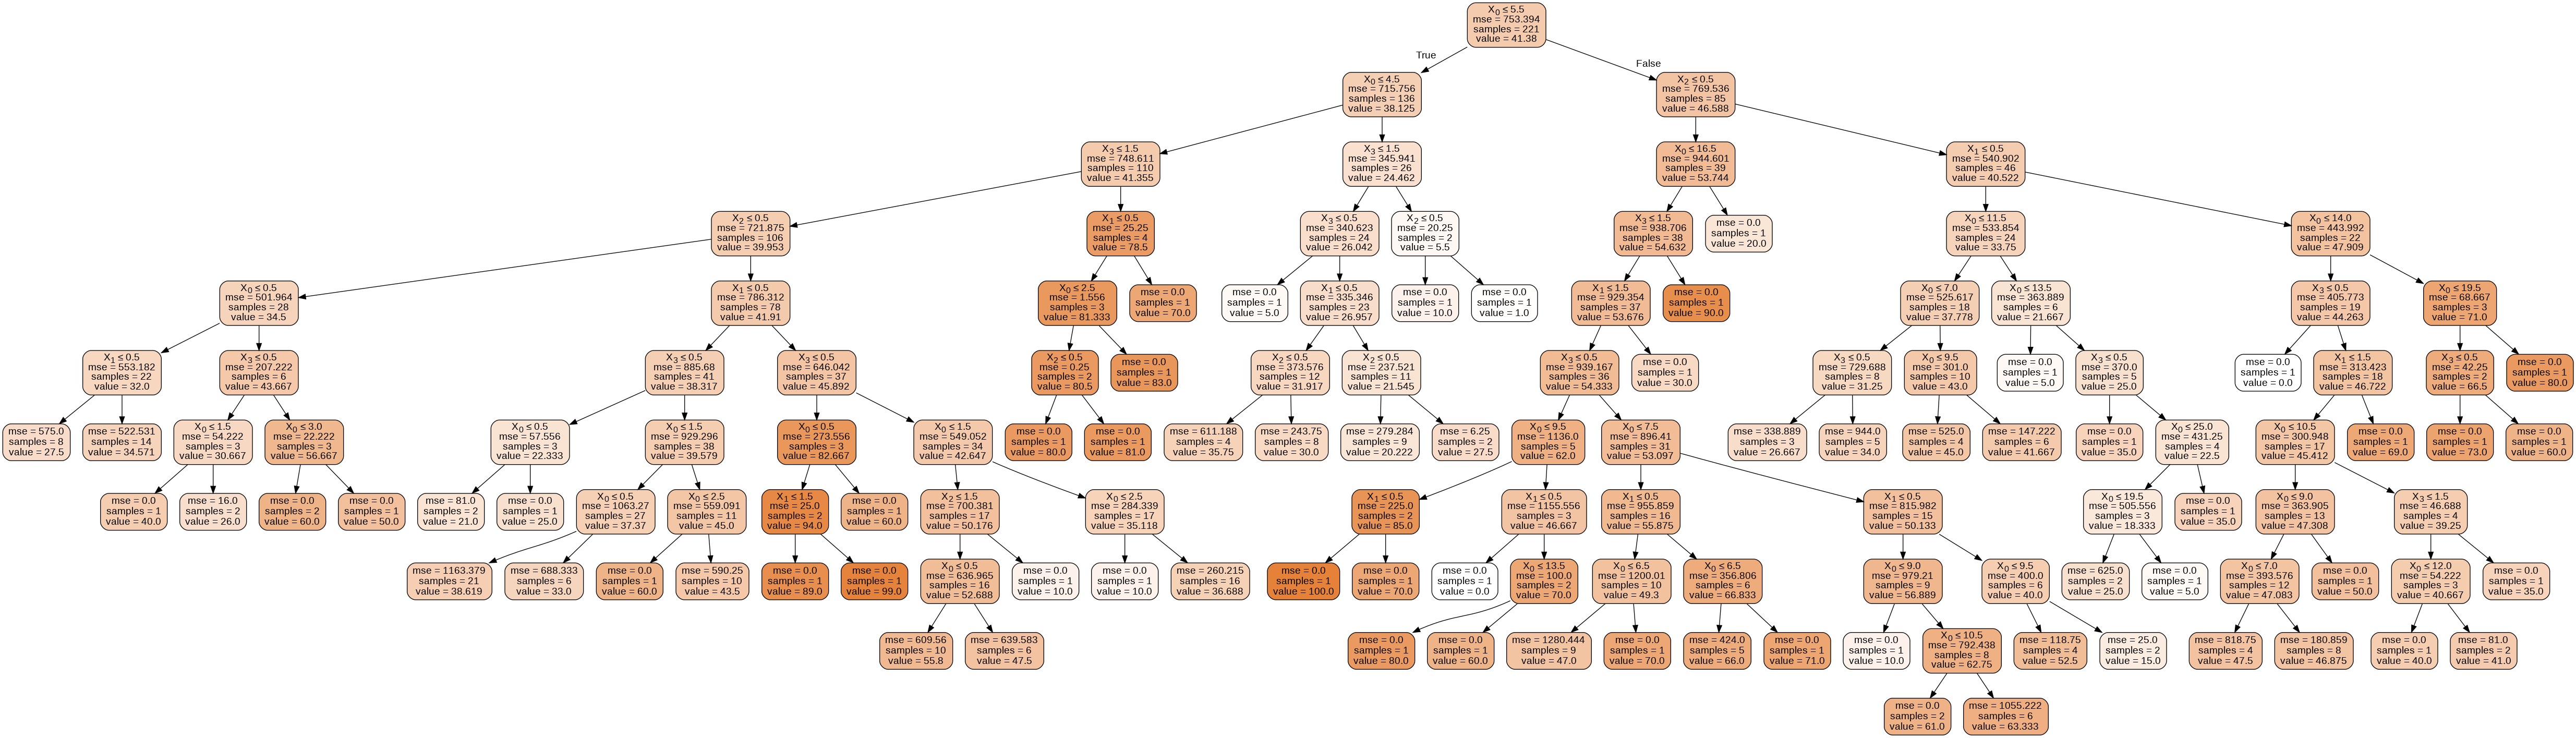

In [532]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('stresslevel.png')
Image(graph.create_png())